# lab 2 Question 5 & 6

# Question 5

In [1]:
import pandas as pd

In [2]:
topplayers_csv_DF = pd.read_csv('datasets/5 Check_top_scorers/Top_Scorers_dataset.csv', sep=',')
topplayers_csv_DF.head()

,Rank,Name,Nationality,Goals
0,1,Alan Shearer,England,260
1,2,Wayne Rooney,England,208
2,3,Andrew Cole,England,187
3,4,Sergio Agüero,Argentina,184
4,5,Frank Lampard,England,177


In [3]:
players_info_DF = pd.read_json('datasets/5 Check_top_scorers/players_stats.json')
players_info_DF.head()

,Name,Height_cm,Appearances,Wins,Losses,Goals_per_match,Assists,Yellow_cards,Red_cards
0,Michael Owen,173,326,142,95,0.46,31,10,1
1,Jermain Defoe,171,496,185,188,0.33,33,40,2
2,Harry Kane,188,245,136,57,0.68,34,27,0
3,Mohamed Salah,175,158,107,21,0.61,34,4,0
4,Romelu Lukaku,190,252,112,80,0.45,35,19,0


In [4]:
#merge the two df with innerjoin on name of the player
players_merged_DF = pd.merge(topplayers_csv_DF, players_info_DF, on = ['Name'], how='inner')
players_merged_DF.head()

,Rank,Name,Nationality,Goals,Height_cm,Appearances,Wins,Losses,Goals_per_match,Assists,Yellow_cards,Red_cards
0,1,Alan Shearer,England,260,183,441,203,129,0.59,64,41,2
1,2,Wayne Rooney,England,208,176,491,284,103,0.42,103,102,3
2,3,Andrew Cole,England,187,178,414,206,106,0.45,73,40,6
3,4,Sergio Agüero,Argentina,184,173,275,186,45,0.67,47,23,1
4,5,Frank Lampard,England,177,184,609,349,127,0.29,102,59,2


<AxesSubplot:title={'center':'Number of matched played VS number of goals'}, xlabel='Appearances', ylabel='Goals'>

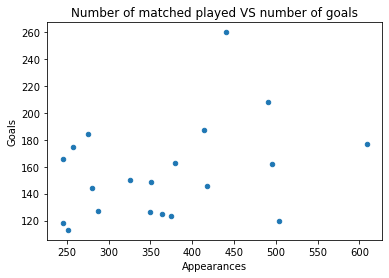

In [5]:
#scatter plot No of played matches vs scored goals for each player 
players_merged_DF.plot.scatter(x = 'Appearances', y = 'Goals', title= 'Number of matched played VS number of goals')

# Question 6

In [6]:
telecome_DF = pd.read_csv('datasets/6 Preparation/WA_Fn-UseC_-Telco-Customer-Churn.csv', sep=',')
telecome_DF.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,NaN,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
telecome_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7037 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7040 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
#TotalCharges should be numerical not object
#but first remove these " " values to be able to convert it to numerical
telecome_DF[telecome_DF['TotalCharges'] == " "]['TotalCharges'].value_counts() #there are 11 records with " " TotalCharges

     11
Name: TotalCharges, dtype: int64

In [9]:
# take only with values that can be converted
telecome_DF = telecome_DF[telecome_DF.TotalCharges != " "]

In [10]:
#convert TotalCharges column to float64
telecome_DF['TotalCharges'] = telecome_DF['TotalCharges'].astype('float64')
telecome_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7026 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7029 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [11]:
#separate dataset for labels (Churn)
label_churn_DF = telecome_DF.Churn 

In [12]:
#drop customer id & chrun
telecome_DF.drop(['customerID', 'Churn'], axis = 1, inplace=True)

In [13]:
telecome_DF.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [14]:
#handle missing values
#gender has 6 null values
#payment method has one null value 

#Drop these missing values as they are very small number
telecome_DF.dropna(how='any', subset=['gender', 'PaymentMethod'], inplace=True)

In [15]:
telecome_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7025 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7025 non-null   object 
 1   SeniorCitizen     7025 non-null   int64  
 2   Partner           7025 non-null   object 
 3   Dependents        7025 non-null   object 
 4   tenure            7025 non-null   int64  
 5   PhoneService      7025 non-null   object 
 6   MultipleLines     7025 non-null   object 
 7   InternetService   7022 non-null   object 
 8   OnlineSecurity    7025 non-null   object 
 9   OnlineBackup      7025 non-null   object 
 10  DeviceProtection  7025 non-null   object 
 11  TechSupport       7025 non-null   object 
 12  StreamingTV       7025 non-null   object 
 13  StreamingMovies   7025 non-null   object 
 14  Contract          7025 non-null   object 
 15  PaperlessBilling  7025 non-null   object 
 16  PaymentMethod     7025 non-null   object 


In [16]:
# onehot encoding for categorical columns with get_dummies
telecome_DF = pd.get_dummies(telecome_DF)

In [17]:
telecome_DF.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
5,0,8,99.65,820.50,1,0,1,0,1,0,...,1,1,0,0,0,1,0,0,1,0


In [18]:
telecome_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7025 entries, 0 to 7042
Data columns (total 45 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7025 non-null   int64  
 1   tenure                                   7025 non-null   int64  
 2   MonthlyCharges                           7025 non-null   float64
 3   TotalCharges                             7025 non-null   float64
 4   gender_Female                            7025 non-null   uint8  
 5   gender_Male                              7025 non-null   uint8  
 6   Partner_No                               7025 non-null   uint8  
 7   Partner_Yes                              7025 non-null   uint8  
 8   Dependents_No                            7025 non-null   uint8  
 9   Dependents_Yes                           7025 non-null   uint8  
 10  PhoneService_No                          7025 no